![rmotr](https://user-images.githubusercontent.com/7065401/52071918-bda15380-2562-11e9-828c-7f95297e4a82.png)
<hr style="margin-bottom: 40px;">

<img src="https://user-images.githubusercontent.com/7065401/69450217-6cee2780-0d3b-11ea-947b-461ea407da85.jpg"
    style="width:400px; float: right; margin: 0 40px 40px 40px;"></img>

### Project

# New York City Airbnb Open Data

Let's put in practice the topics covered in the course and analyze Airbnb listings data.

Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Hands on! 

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Read the `airbnb_data` dataset into a `airbnb_df` DataFrame variable.

This data file includes all needed information to find out more about hosts and geographical availability.

This public dataset is part of Airbnb, and the original source can be found on this [website](http://insideairbnb.com/).


The column names are taken from the original documentation for this dataset.

In [25]:
airbnb_df = pd.read_csv('data/airbnb_data.csv')

airbnb_df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,lat_lon,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,"Kensington, Brooklyn",40.64749;-73.97237,Private room,"$149,00.-",1,9,19/10/18,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,"Midtown, Manhattan",40.75362;-73.98377,Entire home/apt,"$225,00.-",1,45,21/5/19,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,"Harlem, Manhattan",40.80902;-73.9419,Private room,"$150,00.-",3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,"Clinton Hill, Brooklyn",40.68514;-73.95976,Entire home/apt,"$89,00.-",1,270,5/7/19,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,"East Harlem, Manhattan",40.79851;-73.94399,Entire home/apt,"$80,00.-",10,9,19/11/18,0.10,1,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Setting `airbnb_data` index.

Set the index of the DataFrame to the `listing_id` column.

In [26]:
airbnb_df.set_index('listing_id', inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Checking missing data

We need to check if our `airbnb_data` has any null value. 

To do that, let's create a `percent_missing` Series containing the column names and the percent of missing values per column.

In [27]:
percent_missing = airbnb_df.isna().mean().round(4) * 100

percent_missing

listing_name                      0.00
host_id                           0.00
host_name                         0.09
neighbourhood_group               0.00
lat_lon                           0.00
room_type                         0.00
price                             0.00
minimum_nights                    0.00
number_of_reviews                 0.00
last_review                       4.06
reviews_per_month                 4.06
calculated_host_listings_count    0.00
availability_365                  0.00
dtype: float64

In [29]:
airbnb_df.isna().sum()

listing_name                       0
host_id                            0
host_name                          1
neighbourhood_group                0
lat_lon                            0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       43
reviews_per_month                 43
calculated_host_listings_count     0
availability_365                   0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `reviews_per_month` missing values

Impute null values in the `reviews_per_month` column with a `0` value.

In [30]:
# solution

# airbnb_df['reviews_per_month'].fillna(0, inplace=True)
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

In [31]:
airbnb_df.isna().sum()

listing_name                       0
host_id                            0
host_name                          1
neighbourhood_group                0
lat_lon                            0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       43
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_name` missing values

Drop the rows where `host_name` has a missing value.

In [34]:
airbnb_df = airbnb_df.loc[airbnb_df['host_name'].notna()]

In [33]:
airbnb_df.isna().sum()

listing_name                       0
host_id                            0
host_name                          0
neighbourhood_group                0
lat_lon                            0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                       43
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `last_review` missing values

Drop the rows where `last_review` has a missing value.

In [35]:
airbnb_df = airbnb_df.dropna(subset=['last_review'])

In [36]:
airbnb_df.isna().sum()

listing_name                      0
host_id                           0
host_name                         0
neighbourhood_group               0
lat_lon                           0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Dealing with `host_id` invalid values

Drop the rows where `host_id` has a `0` value.

In [37]:
airbnb_df = airbnb_df.loc[airbnb_df['host_id'] != 0]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Now cast this `last_review` column to `datetime`

In [39]:
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Duplicated listings

Many listings could be duplicated. Drop all the entries that have the same `listing_name`, `price` and `room_type`. Keep just the last entry.

In [41]:
airbnb_df.drop_duplicates(subset=['listing_name', 'price', 'room_type'],
                          keep='last',
                          inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Invalid `price`

Check the `price`. It should be a numeric type column.

- Remove the `$`, `.` and `-` characters.
- Replace `,` with a `.` character.
- Cast the column to `float` dtype.

In [42]:
airbnb_df['price'] = airbnb_df['price'].str.replace('$', '')
airbnb_df['price'] = airbnb_df['price'].str.replace(',', '.')
airbnb_df['price'] = airbnb_df['price'].str.replace('.-', '')

airbnb_df['price'] = airbnb_df['price'].astype('float')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `neighbourhood_group` column

Check the `neighbourhood_group` column. It should be divided into two different columns: `neighbourhood` and `borough`.

After the split, drop the `neighbourhood_group` column.

In [43]:
airbnb_df[['neighbourhood', 'borough']] = airbnb_df['neighbourhood_group'].str.split(', ', expand=True)

airbnb_df.drop(columns='neighbourhood_group', inplace=True)

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Separating `lat_lon` column

Create two new columns `latitude` and `longitude` containing the product of splitting the `lat_lon` column. Both new columns should be casted to `float` dtype.

After the split, drop the `lat_lon` column.

In [44]:
airbnb_df[['latitude', 'longitude']] = airbnb_df['lat_lon'].str.split(';', expand=True)

airbnb_df.drop(columns='lat_lon', inplace=True)

airbnb_df = airbnb_df.astype({'latitude': 'float',
                              'longitude': 'float'})

#### Visualizing points on a map

Let's visualize your `airbnb_df` to confirm everything is in correct format so far.

Execute the below code to visualize the `latitude` and `longitude` you just created.

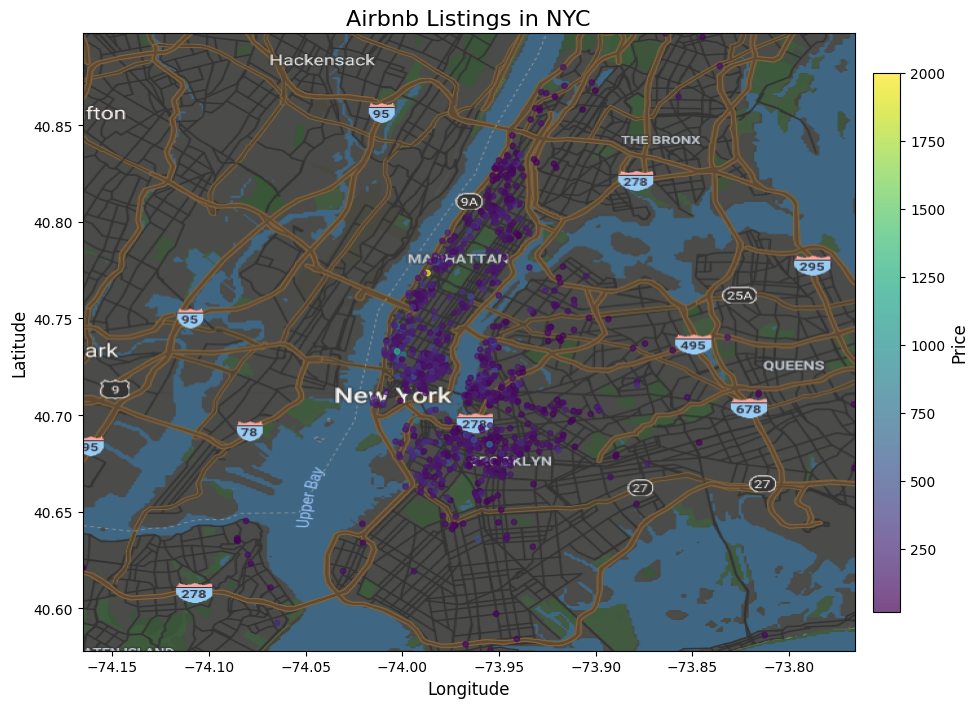

In [70]:
longlat_min_max = (airbnb_df.longitude.min(), airbnb_df.longitude.max(), airbnb_df.latitude.min(), airbnb_df.latitude.max())

nyc = plt.imread('./data/nyc-map.png')

fig, ax = plt.subplots(figsize=(12,10))

scatter = ax.scatter(
    airbnb_df.longitude, 
    airbnb_df.latitude, 
    zorder=1, 
    alpha=0.7, 
    c=airbnb_df['price'], 
    cmap='viridis', 
    s=15
)

ax.set_title('Airbnb Listings in NYC', fontsize=16)

cbar = fig.colorbar(scatter, ax=ax, orientation='vertical', shrink=0.7, pad=0.02)
cbar.set_label('Price', fontsize=12)

ax.imshow(nyc, extent=longlat_min_max, zorder=0, alpha=0.8)

ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Fixing `availability_365` values

This columns should casted to numeric dtype, but it has many invalid string values, like `43+N524`, that should be coerced while casting.

Also we can see many values out of domain, let's fix them:
- Negative numbers, that should be converted to positive.
- Numbers above 365, that should be dropped.

In [71]:
airbnb_df['availability_365'].unique()

array(['365', '355', '194', '0', '129', '220', '188', '6', '39', '314',
       '46', '321', '12', '21', '347', '364', '304', '233', '85', '75',
       '311', '67', '255', '284', '359', '269', '340', '22', '96', '345',
       '273', '3454', '95', '215', '265', '192', '251', '302', '140',
       '234', '257', '30', '301', '294', '320', '154', '5234', '180',
       '231', '297', '292', '191', '72', '362', '336', '116', '88', '224',
       '322', '324', '132', '295', '238', '209', '328', '7', '272', '26',
       '288', '317', '207', '185', '158', '9', '198', '219', '342', '312',
       '243', '152', '137', '222', '346', '208', '279', '250', '164',
       '298', '260', '107', '199', '299', '20', '318', '216', '245',
       '189', '307', '310', '213', '278', '16', '178', '275', '163', '34',
       '280', '1', '170', '214', '248', '262', '339', '10', '290', '230',
       '53', '126', '3', '37', '353', '177', '1111', '246', '225', '18',
       '343', '326', '162', '240', '363', '247', '323', '

In [72]:
airbnb_df['availability_365'] = pd.to_numeric(airbnb_df['availability_365'], errors='coerce')

airbnb_df = airbnb_df.loc[(airbnb_df['availability_365'] <= 365) & (airbnb_df['availability_365'] >= 0)]

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most reviews

Create a Series `most_reviews` containing the top 10 `host_name`s with the most total (sum) reviews per month accross all properties owned by that host.

In [73]:
most_reviews = airbnb_df['reviews_per_month'].groupby(airbnb_df['host_name']).sum().sort_values(ascending=False).head(10)

#### Visualizing most_reviews

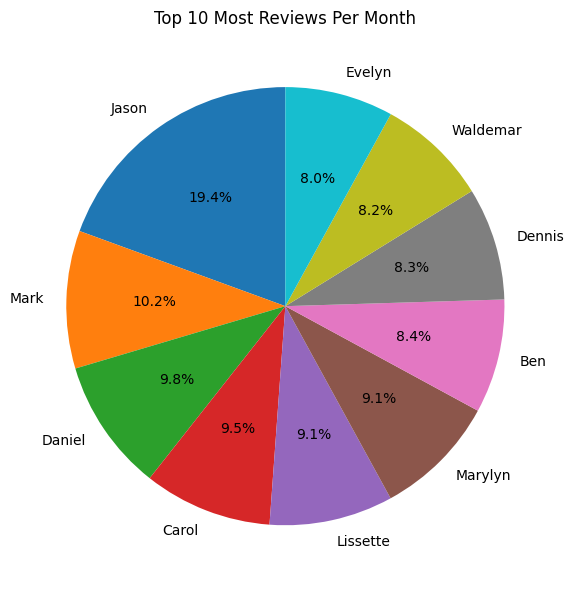

In [80]:
most_reviews.plot(
    kind='pie',
    figsize=(6, 6),
    autopct='%1.1f%%',  
    startangle=90,      
    cmap='tab10'     
)
plt.title("Top 10 Most Reviews Per Month", fontsize=12)
plt.ylabel('')
plt.tight_layout()
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Most expensive listings

Create a variable `expensive_listings_df` containing the top 100 most expensive per night listings. The most expensive should be at the top.

In [81]:
expensive_listings_df = airbnb_df.sort_values(by='price', ascending=False).head(100)

expensive_listings_df

,listing_name,host_id,host_name,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood,borough,latitude,longitude
listing_id,,,,,,,,,,,,,,,
174966,Luxury 2Bed/2.5Bath Central Park View,836168,Henry,Entire home/apt,2000.0,30,30,2018-05-05,0.33,11,0.0,Upper West Side,Manhattan,40.77350,-73.98697
273190,6 Bedroom Landmark West Village Townhouse,605463,West Village,Entire home/apt,1300.0,5,28,2018-09-25,0.31,4,297.0,West Village,Manhattan,40.73301,-74.00268
250801,Heart & Soul of Greenwich Village,1314834,Rhona,Entire home/apt,850.0,3,107,2019-05-23,1.15,1,249.0,Greenwich Village,Manhattan,40.73129,-73.99944
279857,#1 Yellow Block BnB/see at Net Flix Show Stay ...,1420300,Gordy,Entire home/apt,800.0,4,122,2019-02-07,1.37,1,257.0,Bedford-Stuyvesant,Brooklyn,40.68492,-73.95489
19601,perfect for a family or small group,74303,Maggie,Entire home/apt,800.0,1,25,2016-04-08,0.24,1,7.0,Brooklyn Heights,Brooklyn,40.69723,-73.99268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53477,3 floors of luxury!,204539,Mark,Entire home/apt,265.0,7,38,2019-04-27,0.38,5,365.0,Middle Village,Queens,40.71546,-73.87854
127387,"Luxe, Spacious 2BR 2BA Nr Trains",23276,Katharine,Entire home/apt,260.0,30,3,2014-04-08,0.03,1,316.0,Gowanus,Brooklyn,40.66862,-73.99260
144087,LUXURY OF THE HORIZON,616825,Rinaldo,Entire home/apt,259.0,8,17,2019-05-18,0.17,1,343.0,Harlem,Manhattan,40.80473,-73.95320


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has biggest amount of expensive listings?

Using the `expensive_listings_df` listings count the occurrences of each `neighbourhood` they belong.

In [82]:
expensive_listings_df['neighbourhood'].value_counts()

neighbourhood
Williamsburg          10
Chelsea                9
East Village           7
Greenpoint             7
West Village           7
Harlem                 7
Upper West Side        5
Clinton Hill           4
Carroll Gardens        4
Nolita                 4
Midtown                3
Upper East Side        3
Bedford-Stuyvesant     3
Hell's Kitchen         3
Park Slope             2
Boerum Hill            2
SoHo                   2
Lower East Side        2
South Slope            2
Brooklyn Heights       1
Little Italy           1
Flatbush               1
Greenwich Village      1
Prospect Heights       1
Gramercy               1
Ridgewood              1
DUMBO                  1
Flatiron District      1
Chinatown              1
Washington Heights     1
Financial District     1
Middle Village         1
Gowanus                1
Name: count, dtype: int64

#### Visualizing neighbourhoods

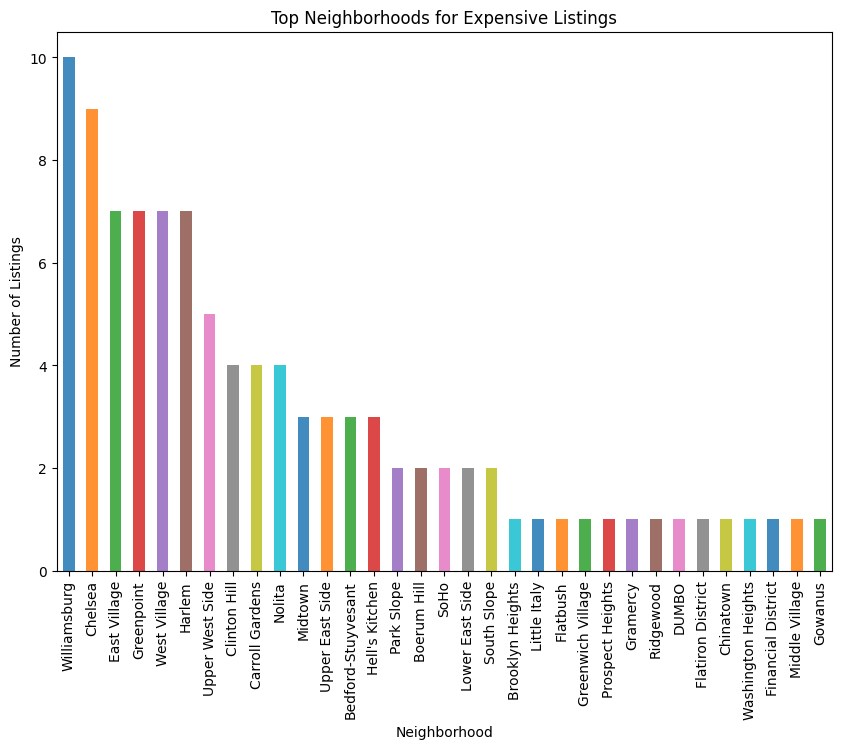

In [106]:
plt.figure(figsize=(10,7))

expensive_listings_df['neighbourhood'].value_counts().plot(
    kind='bar', 
    color=sns.color_palette(),
    alpha=0.85        
)
plt.title('Top Neighborhoods for Expensive Listings', fontsize=12)
plt.xlabel('Neighborhood', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)



plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Which neighbourhood has the most listings?

Using all the listings from `airbnb_df` count how many listings each neighbourhood has. Keep just the top 10 neighbourhoods with the most listings.

In [93]:
airbnb_df['neighbourhood'].value_counts().head(10)

neighbourhood
Williamsburg          109
Harlem                 74
Bedford-Stuyvesant     71
East Village           65
Upper West Side        44
Greenpoint             42
West Village           33
Crown Heights          31
Hell's Kitchen         30
Park Slope             27
Name: count, dtype: int64

#### Visualizing neighbourhoods

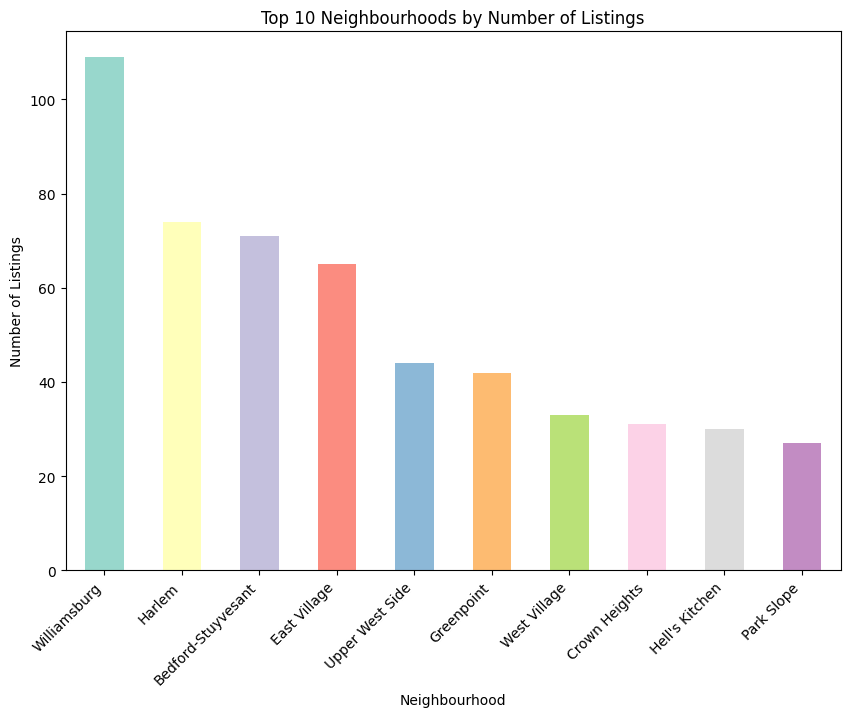

In [102]:
top_neighbourhoods = airbnb_df['neighbourhood'].value_counts().head(10)

plt.figure(figsize=(10, 7))
top_neighbourhoods.plot(
    kind='bar', 
    color=sns.color_palette('Set3', len(top_neighbourhoods)), 
    alpha=0.9           
)

plt.title('Top 10 Neighbourhoods by Number of Listings', fontsize=12)
plt.xlabel('Neighbourhood', fontsize=10)
plt.ylabel('Number of Listings', fontsize=10)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.show()


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)